<a href="https://colab.research.google.com/github/Dena7Qatry/Bayesian_Classifier_Scratch_MNIST/blob/main/Bayesian_Classifier_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement Bayesian classifier from scratch, use it on MNIST dataset, and test.

Generate the confusion matrix and F1 score for each Dist.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns #statistical data visualization
from math import exp, pi,log, sqrt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# implement Bayesian classifier from scratch
Each feature is continious, univariant

In [ ]:
def naive_bayes(data,X_test):

 #split the features and target
 X=data.iloc[-1,:]
 Y=data.loc[:, data.columns != 'label']
 X_train=data.loc[:, data.columns != 'label']
 Y_train=data.iloc[:, 0]
 Y_train=pd.DataFrame(Y_train)
 Y_train.transpose().shape
 no_samples,n_feature=X_train.shape
 classes=np.unique(Y_train)
 no_classes=len(classes)
 p_class=1/no_classes                           # P(c) for all class is equal .
 mean_v=np.zeros([no_classes,n_feature])       #To store the mean of Features wrt classes
 var_v=np.zeros([no_classes,n_feature])        #To store the variance of Features wrt classes
 var_std_v=np.zeros([no_classes,n_feature])

 # calculate mean and var for each class
 for k in classes:
  data_class_k=data.loc[data.iloc[:, 0]==k]  #Filter samples for each class
  X_class_k=data_class_k.loc[:, data_class_k.columns != 'label']
  #Find mean of each class & save in corresonding mean matrix
  mean_v[int(k),:]=X_class_k.mean(axis=0)
  #Find variance of each class & save in corresonding mean matrix
  var_v[int(k),:]=X_class_k.var(axis=0)
  var_std_v[int(k),:]=X_class_k.std(axis=0)
 var_v=var_v+1000    #Since variance is 0 for many pixels, Adding 1000 gives one of the best accuracies


 #Class Probabilities
 pred=[]
 for i in range(X_test.shape[0]):
        lists=[]
        for j in range(no_classes):
            numerator=np.exp(-((X_test.iloc[i]-mean_v[j])**2)/(2*var_v[j]))
            denominator=np.sqrt(2*np.pi*(var_v[j]))
            prob_xc=numerator/denominator
            ratio=np.sum(np.log(prob_xc)) #Probability of jth class for ith feature
            lists.append(ratio) #Append Probability of jth class for ith feature
        pred.append(lists.index(max(lists))) # y predicted has the maximum probability for jth feature vector

 return pred,mean_v,var_v


Read MNIST dataset:

In [ ]:
df_train = pd.read_csv("/content/mnist_train.csv")
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


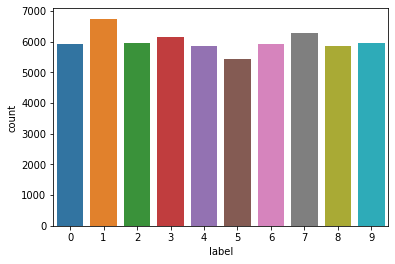

In [ ]:
sns.countplot(x='label',data= df_train )

In [ ]:
#drop duplicates
df_train.drop_duplicates(inplace=True)
print('duplicate values -> {}'.format(df_train.duplicated().sum()))
# Drop the null values
df_train.dropna(inplace=True)
df_train.isnull().sum()

duplicate values -> 0


label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [ ]:
X=df_train.iloc[-1,:]
Y=df_train.loc[:, df_train.columns != 'label']

In [ ]:
#split the features and target
X_train=df_train.loc[:, df_train.columns != 'label']
Y_train=df_train.iloc[:, 0]
Y_train=pd.DataFrame(Y_train)
Y_train.transpose().shape

(1, 60000)

# Test dataset:

In [ ]:
df_test = pd.read_csv("/content/mnist_test.csv")
df_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


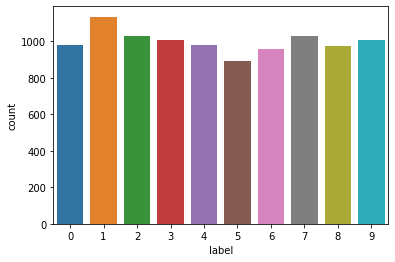

In [ ]:
sns.countplot(x='label',data= df_test )

In [ ]:
#drop duplicates
df_test.drop_duplicates(inplace=True)
print('duplicate values -> {}'.format(df_train.duplicated().sum()))
# Drop the null values
df_test.dropna(inplace=True)
df_test.isnull().sum()

duplicate values -> 0


label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [ ]:
#split the features and target
X_test=df_test.loc[:, df_test.columns != 'label']
Y_test=df_test.iloc[:, 0]
Y_test=pd.DataFrame(Y_test)
Y_test.transpose().shape

(1, 10000)

# Test the Naive_bayes model:

In [ ]:
NB= naive_bayes
Y_NBpred,mean_v,var_v =NB(df_train,X_test)

# Calculate accuracy and Generate F1 score for each Dist:

In [ ]:
print ("Accuracy =", accuracy_score(Y_test, Y_NBpred )*100)
# Cross validate the scores
print ("Classification Report \n {}",(classification_report(Y_test, Y_NBpred, labels=range(0,10))))


Accuracy = 81.49
Classification Report 
 {}               precision    recall  f1-score   support

           0       0.93      0.92      0.92       980
           1       0.82      0.97      0.88      1135
           2       0.92      0.75      0.83      1032
           3       0.82      0.81      0.81      1010
           4       0.85      0.65      0.74       982
           5       0.88      0.64      0.74       892
           6       0.84      0.90      0.87       958
           7       0.94      0.81      0.87      1028
           8       0.69      0.76      0.73       974
           9       0.62      0.89      0.73      1009

    accuracy                           0.81     10000
   macro avg       0.83      0.81      0.81     10000
weighted avg       0.83      0.81      0.81     10000



# Generate the confusion matrix :

Text(0.5, 42.0, 'Predicted label')

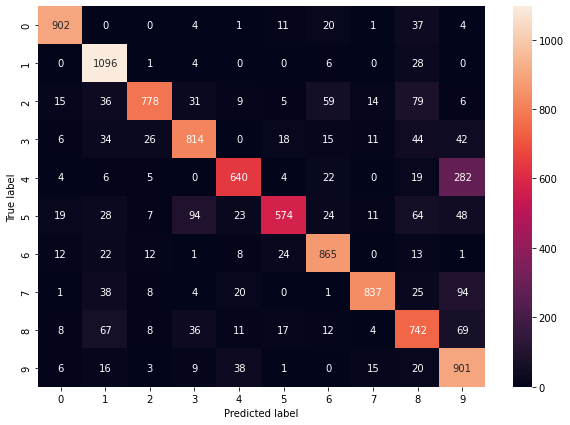

In [ ]:
cm = confusion_matrix(Y_test, Y_NBpred)
plt.figure(figsize=(10,7))
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

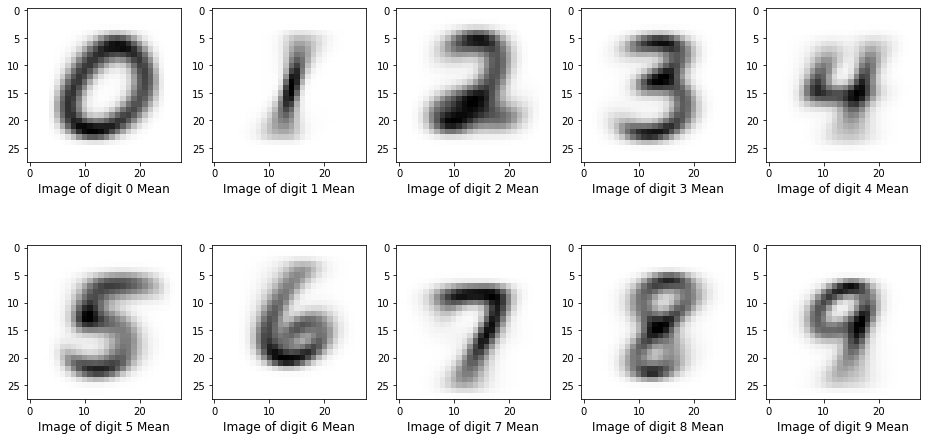

In [ ]:
#Print Mean of each Class in 28*28 Form
plt.figure(figsize=(16,8))
for i in range(mean_v.shape[0]):
    plt.subplot(2,5, i+1)
    img = mean_v[i].reshape(28,28)
    plt.imshow(img, cmap="Greys")
    plt.xlabel('Image of digit '+str(i)+' Mean',fontsize = 12)

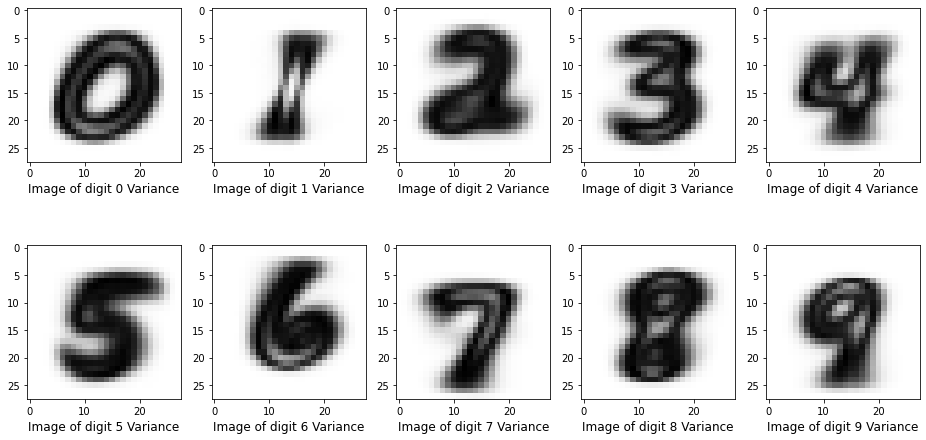

In [ ]:
#Print Variance of each Class in 28*28 Form
plt.figure(figsize=(16,8))
for i in range(var_v.shape[0]):
    plt.subplot(2,5, i+1)
    img = var_v[i].reshape(28,28)
    plt.imshow(img, cmap="Greys")
    plt.xlabel('Image of digit '+str(i)+' Variance',fontsize = 12)

# Compare with Sklearn GaussianNB:

In [ ]:
clf = GaussianNB()
# Perform the predictions
clf.fit(X_train,Y_train)
# Perform the predictions
y_predicted = clf.predict(X_test)
# Calculate the accuracy of the prediction
print ("Accuracy =", accuracy_score(Y_test, y_predicted)*100)
# Cross validate the scores
print ("Classification Report \n",(classification_report(Y_test, y_predicted, labels=range(0,10))))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy = 55.58
Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000



# Compare with KNN:

In [ ]:
clf = KNeighborsClassifier()
# Perform the predictions
clf.fit(X_train,Y_train)
# Perform the predictions
y_predicted = clf.predict(X_test)
# Calculate the accuracy of the prediction
print ("Accuracy =", accuracy_score(Y_test, y_predicted)*100)
# Cross validate the scores
print ("Classification Report \n",(classification_report(Y_test, y_predicted, labels=range(0,10))))

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy = 96.88
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Comment:
The accuracy of our model is  **81.49%** , which is bigger than GaussianNB of **55.58%** accuracy , somehow close to The knn of **96.88%**